# Assignment 2: Modeling blood flow in the circulatory system

**Author:** Kacper Koźmin
**Album Number:** 268571
**Date:** October 9, 2025



Import numpy and matplotlib for numerical calculations and plotting.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Define physical constants and viscosity scenarios used in the simulations.

In [9]:

ETA_SCENARIOS = {
    'Normal': 3.5e-3,
    'Anemia': 2.8e-3
}

MMHG_TO_PA = 133.322
PIN = 100 * MMHG_TO_PA
POUT = 10 * MMHG_TO_PA
NUM_TERMINALS = 4

Define a Vessel class that stores geometry and computes hydrodynamic resistance.

In [10]:
class Vessel():
    """Represents a single blood vessel."""
    def __init__(self, L, r, eta):
        self.L = L
        self.r = r
        self.eta = eta
    
    @property
    def R(self):
        """Calculates the hydrodynamic resistance of the vessel."""
        return (8 * self.eta * self.L) / (np.pi * self.r**4)

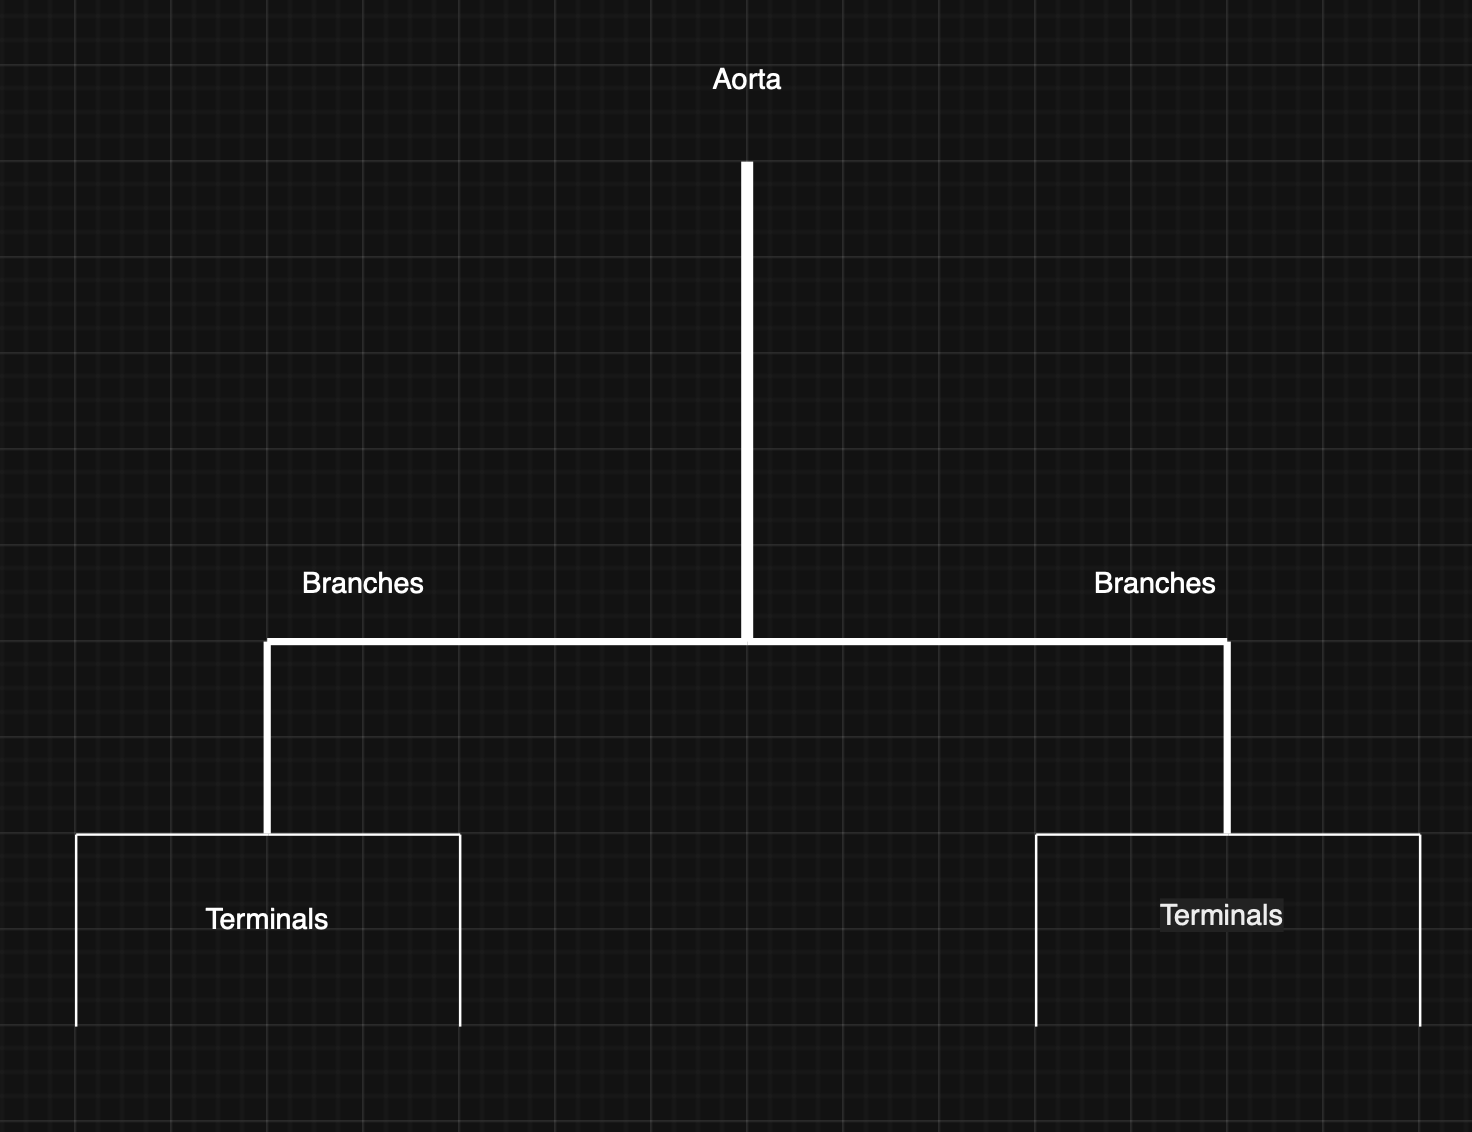

Define functions to compute network resistance and run viscosity and sensitivity analyses (with plotting).

In [11]:
def calculate_total_resistance(aorta, branches, terminals):
    """Calculates the total equivalent resistance for the entire vascular network."""
    R_term_eq = terminals[0].R / 2
    R_path1 = R_term_eq + branches[0].R
    R_parallel_paths = R_path1 / 2
    R_total = aorta.R + R_parallel_paths
    return R_total

def run_viscosity_analysis_and_plot(scenarios):
    """Runs the viscosity analysis for different scenarios and generates a bar chart."""
    print("Viscosity Analysis ---")
    
    results = {}
    for case_name, eta_value in scenarios.items():

        aorta = Vessel(L=0.3, r=0.012, eta=eta_value)
        branches = [Vessel(L=0.2, r=0.006, eta=eta_value) for _ in range(2)]
        terminals = [Vessel(L=0.02, r=0.0015, eta=eta_value) for _ in range(NUM_TERMINALS)]
        

        R_total = calculate_total_resistance(aorta, branches, terminals)
        Q_total = (PIN - POUT) / R_total
        Q_single_terminal = Q_total / NUM_TERMINALS
        
        results[case_name] = Q_single_terminal

    print(f"Perfusion results (m^3/s): {results}")


    names = list(results.keys())
    values_ml_s = [q * 1e6 for q in results.values()]

    plt.bar(names, values_ml_s, color=['skyblue', 'salmon'])
    plt.ylabel("Flow in arteriole (ml/s)")
    plt.title("Perfusion Comparison: Normal vs. Anemia")
    plt.show()

def run_sensitivity_analysis(base_aorta, base_branches, base_terminals):
    """Runs the sensitivity analysis for changes in terminal radius."""
    print("Radius Sensitivity Analysis ---")
    
    # Baseline case
    R_base = calculate_total_resistance(base_aorta, base_branches, base_terminals)
    Q_base = (PIN - POUT) / R_base
    
    # -10% radius scenario
    r_smaller = base_terminals[0].r * 0.9
    terminals_smaller = [Vessel(L=0.02, r=r_smaller, eta=base_terminals[0].eta) for _ in range(NUM_TERMINALS)]
    R_smaller = calculate_total_resistance(base_aorta, base_branches, terminals_smaller)
    Q_smaller = (PIN - POUT) / R_smaller

    # +10% radius scenario
    r_bigger = base_terminals[0].r * 1.1
    terminals_bigger = [Vessel(L=0.02, r=r_bigger, eta=base_terminals[0].eta) for _ in range(NUM_TERMINALS)]
    R_bigger = calculate_total_resistance(base_aorta, base_branches, terminals_bigger)
    Q_bigger = (PIN - POUT) / R_bigger

    print(f"Baseline flow: {Q_base * 1e6:.2f} ml/s")
    print(f"Flow (-10% r): {Q_smaller * 1e6:.2f} ml/s")
    print(f"Flow (+10% r): {Q_bigger * 1e6:.2f} ml/s")

Create baseline vessel objects for the 'Normal' viscosity scenario.

In [12]:

base_eta = ETA_SCENARIOS['Normal']
aorta_base = Vessel(L=0.3, r=0.012, eta=base_eta)
branches_base = [Vessel(L=0.2, r=0.006, eta=base_eta) for _ in range(2)]
terminals_base = [Vessel(L=0.02, r=0.0015, eta=base_eta) for _ in range(NUM_TERMINALS)]

Run the radius sensitivity analysis to observe flow changes for ±10% terminal radius.

In [13]:

run_sensitivity_analysis(aorta_base, branches_base, terminals_base)

Radius Sensitivity Analysis ---
Baseline flow: 1247.39 ml/s
Flow (-10% r): 843.02 ml/s
Flow (+10% r): 1757.07 ml/s


### Sensitivity Analysis of Radius's Impact on Perfusion

The sensitivity analysis revealed that the system's total flow ($Q_{total}$) is highly sensitive to small changes in the radius of the terminal arterioles.

* A **10% decrease** in radius (to 90% of the baseline value) caused a **significant drop in total flow**.
* Conversely, a **10% increase** in radius (to 110% of the baseline value) resulted in a **significant rise in total flow**.

The reason for this disproportionately large effect is the relationship defined by the Hagen-Poiseuille law, where resistance is inversely proportional to the **fourth power of the radius** ($R \propto 1/r^4$). This fourth-power relationship means that even minor adjustments in vessel diameter are amplified into substantial changes in resistance and, consequently, in blood flow. This principle is fundamental to the physiological regulation of blood flow, where small acts of vasoconstriction or vasodilation in arterioles can dramatically alter perfusion in downstream capillary beds.

Compare perfusion between Normal and Anemia viscosity scenarios and show a bar chart.

Viscosity Analysis ---
Perfusion results (m^3/s): {'Normal': 0.00031184664888591745, 'Anemia': 0.0003898083111073969}


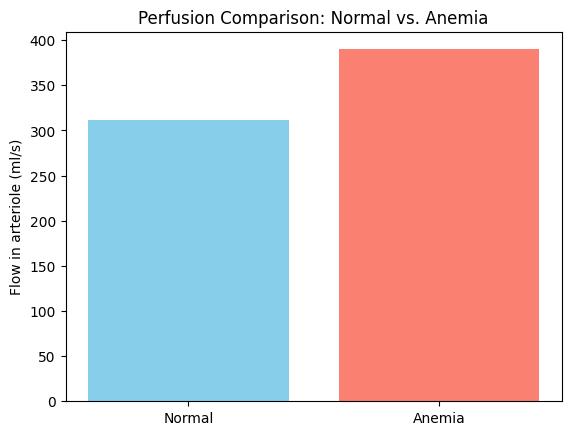

In [16]:

run_viscosity_analysis_and_plot(ETA_SCENARIOS)

### Analysis of Viscosity's Impact on Perfusion

The results clearly demonstrate the relationship between blood viscosity and perfusion rate. In the **anemia scenario**, where blood viscosity is lower ($\eta = 2.8$ mPa·s), we observe a significantly **higher flow rate** in the terminal arterioles compared to the **normal** state ($\eta = 3.5$ mPa·s).

This is a direct consequence of the **Hagen-Poiseuille law**, which states that hydrodynamic resistance ($R$) is directly proportional to viscosity ($\eta$). Therefore, a decrease in viscosity leads to a decrease in the total resistance of the vascular network. According to the fundamental flow equation ($Q = \Delta p / R$), if the pressure drop ($\Delta p$) remains constant, a lower total resistance will inevitably result in a higher total flow ($Q$). This illustrates a physiological compensatory mechanism where the circulatory system can maintain oxygen delivery by increasing flow rate when the oxygen-carrying capacity of the blood is reduced.

## Answer to the Control Question


### Why does a small drop in radius cause a large increase in resistance?
Resistance is inversely proportional to the radius to the **fourth power** ($R \propto 1/r^4$). Because of this fourth-power relationship, even a small change in radius is amplified into a very large, disproportional change in resistance.

### What changes if the branches have different lengths?
If the branches have different lengths, their resistances will be unequal. This causes the blood flow to **distribute unevenly** between them, with more flow favoring the path of lower resistance.